# Image Segmentation : Shelter Map Identification

In [1]:
%reload_ext autoreload
%autoreload 2

import platform
print('Running on python version:',platform.python_version())

import os
import numpy as np
import train as T
import predict as P
from preprocessing.data import create_train_data, create_test_data
from resources.plot_results import plot_loss_epoch

Running on python version: 3.6.6


Using TensorFlow backend.


In [2]:
data_path = '/Users/rizki/Documents/Projects/ShelterSegmentation_take2/shelterdata_forTESTING/180505_v1' 

In [3]:
create_train_data(data_path)#,showSample=True,showNumSample=4)

Creating training images...
Dataset size: 10
Loading done.
Saving to .npy files done.


In [4]:
create_test_data(data_path)

Creating test images...
Dataset size: 10
Loading done.
Saving to .npy files done.


## NEW FEATURE: LOAD_PREV_WEIGHTS, EARLY_STOP_PATIENCE

weights need to be loaded manually in /internal/prev_checkpoints/weights_'+model_str+'.h5'
patience : num of epoch to check for early stopping.

#### "U-Net 64 filters" : all layers have 64 kernels 

In [8]:
train_3 = T.train(data_path,
                  'unet64filters',
                  number_of_epochs=3,
                  batch_size=8,
                  test_data_fraction=0.2,
                  checkpoint_period=1,
                  load_prev_weights=True,
                  early_stop_patience=1)

Loading and preprocessing train data...
Creating and compiling model...
using model: unet64filters (unet but all kernels/filters made to be 64)
Loading prev weights: /Users/rizki/Documents/Projects/ShelterSegmentation_take2/shelterdata_forTESTING/180505_v1/internal/prev_checkpoints/weights_unet64filters.h5
Fitting model...
Train on 8 samples, validate on 2 samples
Epoch 1/3
8/8 [==============================] - 41s 5s/step - loss: -0.2416 - dice_coef: 0.2416 - val_loss: -0.2196 - val_dice_coef: 0.2196
Epoch 2/3
8/8 [==============================] - 41s 5s/step - loss: -0.2526 - dice_coef: 0.2526 - val_loss: -0.2344 - val_dice_coef: 0.2344
Epoch 3/3
8/8 [==============================] - 43s 5s/step - loss: -0.2592 - dice_coef: 0.2592 - val_loss: -0.2366 - val_dice_coef: 0.2366


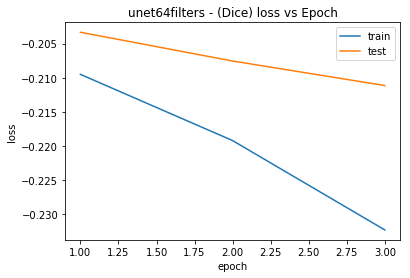

In [9]:
plot_loss_epoch(data_path+'/internal/prev_checkpoints/','unet64filters')

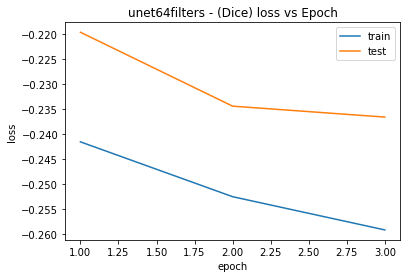

In [10]:
plot_loss_epoch(data_path+'/internal/checkpoints/','unet64filters')
# plot_loss_epoch('/media/data/July20-2018/','unet64filters')

In [ ]:
P.predict(data_path,'unet64filters')
#P.predict(data_path,'unet64filters',ckpt_path_=data_path+'/internal/checkpoints/')